# OHLC Average Prediction

In [1]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import preprocessing 
import yfinance as yf
from sklearn import preprocessing # how to import preprocessing
import sklearn.preprocessing
import numpy as np

In [2]:
# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET
def new_dataset(dataset, step_size):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_size-1):
		a = dataset[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(dataset[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)

In [3]:
#Downloading Data for Wells-Fargo
df = yf.download("WFC",start = "2017-05-26",end = "2022-05-28")

[*********************100%***********************]  1 of 1 completed


In [4]:
#printing Df
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-25,53.250000,53.250000,52.570000,52.779999,45.644703,16643800
2017-05-26,52.630001,52.810001,52.369999,52.410000,45.324734,14247700
2017-05-30,52.160000,52.500000,51.900002,52.160000,45.108528,19379700
2017-05-31,52.230000,52.250000,50.830002,51.139999,44.226425,30519700
2017-06-01,51.529999,52.209999,51.060001,52.080002,45.039345,21001800
...,...,...,...,...,...,...
2022-05-23,42.730000,44.320000,42.730000,43.820000,43.820000,27979100
2022-05-24,43.689999,43.770000,42.639999,43.290001,43.290001,23996000
2022-05-25,43.090000,44.459999,43.029999,44.119999,44.119999,22343900


In [5]:
#Taking Open High Low and Close Columns
df = df[['Open','High','Low','Close']]

In [6]:
df

,Open,High,Low,Close
Date,,,,
2017-05-25,53.250000,53.250000,52.570000,52.779999
2017-05-26,52.630001,52.810001,52.369999,52.410000
2017-05-30,52.160000,52.500000,51.900002,52.160000
2017-05-31,52.230000,52.250000,50.830002,51.139999
2017-06-01,51.529999,52.209999,51.060001,52.080002
...,...,...,...,...
2022-05-23,42.730000,44.320000,42.730000,43.820000
2022-05-24,43.689999,43.770000,42.639999,43.290001
2022-05-25,43.090000,44.459999,43.029999,44.119999


In [7]:
OHLC_avg = df.mean(axis = 1)
HLC_avg = df[['High', 'Low', 'Close']].mean(axis = 1)
close_val = df[['Close']]
new_OHLC_avg=OHLC_avg.copy()

In [8]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(df) + 1, 1)

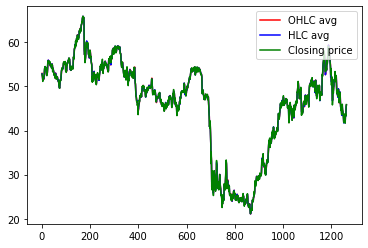

In [9]:
# PLOTTING ALL INDICATORS IN ONE PLOT
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()

In [10]:
# PREPARATION OF TIME SERIES DATASE
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)


In [11]:
# TRAIN-TEST SPLIT
train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]


In [12]:
# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = new_dataset(train_OHLC, 1)
testX, testY = new_dataset(test_OHLC, 1)

In [13]:
# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1

In [14]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

In [15]:
# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adam') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
944/944 - 5s - loss: 0.0285 - 5s/epoch - 5ms/step
Epoch 2/10
944/944 - 2s - loss: 6.1681e-04 - 2s/epoch - 2ms/step
Epoch 3/10
944/944 - 2s - loss: 4.1475e-04 - 2s/epoch - 2ms/step
Epoch 4/10
944/944 - 2s - loss: 3.5086e-04 - 2s/epoch - 2ms/step
Epoch 5/10
944/944 - 2s - loss: 3.1241e-04 - 2s/epoch - 2ms/step
Epoch 6/10
944/944 - 2s - loss: 3.2957e-04 - 2s/epoch - 2ms/step
Epoch 7/10
944/944 - 2s - loss: 3.3042e-04 - 2s/epoch - 2ms/step
Epoch 8/10
944/944 - 2s - loss: 3.1455e-04 - 2s/epoch - 2ms/step
Epoch 9/10
944/944 - 2s - loss: 3.4648e-04 - 2s/epoch - 2ms/step
Epoch 10/10
944/944 - 2s - loss: 3.2059e-04 - 2s/epoch - 2ms/step


In [16]:
trainX

array([[[0.71144833]],

       [[0.7023544 ]],

       [[0.69398573]],

       [[0.68132114]],

       [[0.68372016]],

       [[0.68578443]],

       [[0.68595179]],

       [[0.68104219]],

       [[0.68963403]],

       [[0.69867218]],

       [[0.72015176]],

       [[0.73794911]],

       [[0.74447666]],

       [[0.73923231]],

       [[0.7357175 ]],

       [[0.73298373]],

       [[0.7419103 ]],

       [[0.7293015 ]],

       [[0.71635796]],

       [[0.70335864]],

       [[0.70280074]],

       [[0.71033253]],

       [[0.71646954]],

       [[0.73393217]],

       [[0.77499441]],

       [[0.77170274]],

       [[0.77783977]],

       [[0.77426914]],

       [[0.77566392]],

       [[0.77142381]],

       [[0.76958269]],

       [[0.76378041]],

       [[0.75658335]],

       [[0.76578887]],

       [[0.74921894]],

       [[0.75150636]],

       [[0.74721044]],

       [[0.7549096 ]],

       [[0.75596966]],

       [[0.74196606]],

       [[0.73917653]],

       [[0.75903

In [17]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [18]:
trainPredict

array([[0.6711315 ],
       [0.6627066 ],
       [0.65494174],
       [0.64317036],
       [0.64540213],
       [0.64732164],
       [0.64747727],
       [0.6429108 ],
       [0.6508998 ],
       [0.6592915 ],
       [0.67918146],
       [0.6956013 ],
       [0.7016091 ],
       [0.6967829 ],
       [0.6935454 ],
       [0.6910259 ],
       [0.699248  ],
       [0.6876301 ],
       [0.675674  ],
       [0.66363764],
       [0.66312045],
       [0.67009836],
       [0.67577726],
       [0.6919002 ],
       [0.7295876 ],
       [0.72657865],
       [0.7321866 ],
       [0.7289248 ],
       [0.7301993 ],
       [0.72632366],
       [0.7246397 ],
       [0.7193281 ],
       [0.71273035],
       [0.7211675 ],
       [0.7059687 ],
       [0.70807004],
       [0.7041227 ],
       [0.7111945 ],
       [0.7121673 ],
       [0.69929934],
       [0.6967315 ],
       [0.71498185],
       [0.7149307 ],
       [0.70750636],
       [0.6891739 ],
       [0.68726987],
       [0.6953443 ],
       [0.685

In [19]:
# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [20]:
# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

Train RMSE: 1.71


In [21]:
# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

Test RMSE: 1.70


In [22]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

In [23]:
# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

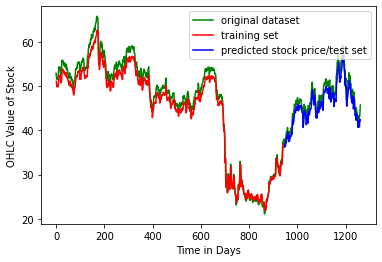

In [24]:
# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg)

# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Stock')
plt.show()



In [25]:
# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val



In [26]:
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print("Last Day Value:", np.asscalar(last_val))
print("Next Day Value:", np.asscalar(last_val*next_val))
# print np.append(last_val, next_val)

Last Day Value: 42.44326400756836
Next Day Value: 39.42967987060547


<ipython-input-26-80ad666a7d2e>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print("Last Day Value:", np.asscalar(last_val))
<ipython-input-26-80ad666a7d2e>:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print("Next Day Value:", np.asscalar(last_val*next_val))


In [27]:
model3=Sequential()
model3.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model3.add(LSTM(16))
model3.add(Dense(1))
model.add(Activation('linear'))
model3.compile(loss='mean_squared_error', optimizer='adam') 

In [28]:

# PREPARATION OF TIME SERIES DATASE 
new_OHLC_avg = np.reshape(new_OHLC_avg.values, (len(new_OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
new_OHLC_avg = scaler.fit_transform(new_OHLC_avg)


#Prediction for next 7 Days
#no.of days
for i in range(7):
    trainX3, trainY3=new_dataset(new_OHLC_avg, 1)
    trainX3 = np.reshape(
trainX3, (trainX3.shape[0], 1, trainX3.shape[1]))
    model3.fit(trainX3, trainY3, epochs=5, batch_size=1, verbose=2)
    
    last_val = new_OHLC_avg[-1]
    next_val = model3.predict(np.reshape(last_val, (1,1,1)))
    new_OHLC_avg = np.append(new_OHLC_avg, next_val[0])
    new_OHLC_avg=new_OHLC_avg.reshape(-1,1)
    
#no.of days
next_val = scaler.inverse_transform(new_OHLC_avg[-7:])




Epoch 1/5
1260/1260 - 5s - loss: 0.0172 - 5s/epoch - 4ms/step
Epoch 2/5
1260/1260 - 2s - loss: 5.7481e-04 - 2s/epoch - 2ms/step
Epoch 3/5
1260/1260 - 2s - loss: 3.8242e-04 - 2s/epoch - 2ms/step
Epoch 4/5
1260/1260 - 2s - loss: 3.5636e-04 - 2s/epoch - 2ms/step
Epoch 5/5
1260/1260 - 2s - loss: 3.8657e-04 - 2s/epoch - 2ms/step
Epoch 1/5
1261/1261 - 2s - loss: 3.6386e-04 - 2s/epoch - 2ms/step
Epoch 2/5
1261/1261 - 2s - loss: 3.7124e-04 - 2s/epoch - 2ms/step
Epoch 3/5
1261/1261 - 3s - loss: 3.7352e-04 - 3s/epoch - 2ms/step
Epoch 4/5
1261/1261 - 2s - loss: 3.5786e-04 - 2s/epoch - 2ms/step
Epoch 5/5
1261/1261 - 2s - loss: 3.6705e-04 - 2s/epoch - 2ms/step
Epoch 1/5
1262/1262 - 2s - loss: 3.6513e-04 - 2s/epoch - 2ms/step
Epoch 2/5
1262/1262 - 2s - loss: 3.6592e-04 - 2s/epoch - 2ms/step
Epoch 3/5
1262/1262 - 2s - loss: 3.7732e-04 - 2s/epoch - 2ms/step
Epoch 4/5
1262/1262 - 2s - loss: 3.6337e-04 - 2s/epoch - 2ms/step
Epoch 5/5
1262/1262 - 2s - loss: 3.6926e-04 - 2s/epoch - 2ms/step
Epoch 1/5
1263

In [29]:
#Creating DataFrames to plot output
final_val = []
next_val1 = []
next_val1 = np.append(next_val1, np.repeat(np.nan, len(OHLC_avg[897:])))
next_val1 = next_val1.reshape(-1,1)
for i in next_val1:
    final_val.append(i)
for i in next_val:
    final_val.append(i)


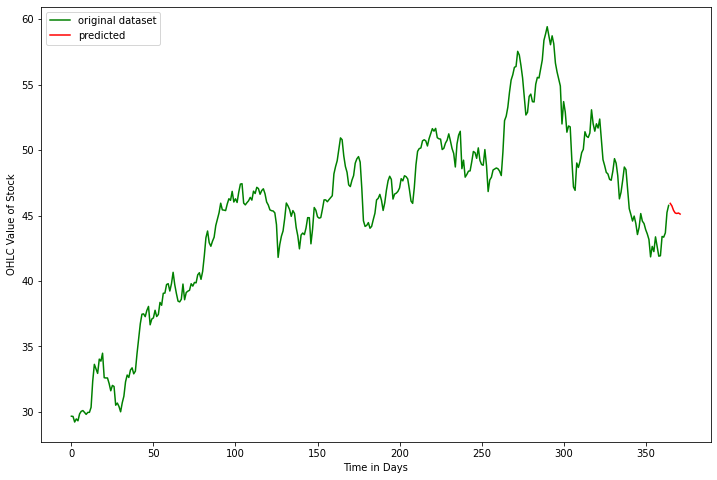

In [30]:
#plotting Graph of last one year along with predictions
plt.figure(figsize = (12,8))
plt.plot(OHLC_avg[897:], 'g', label = 'original dataset')
plt.plot(final_val, 'r', label = 'predicted')
plt.legend(loc = 'upper left')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Stock')
plt.show()


In [33]:
#To be stored in DB (final_val)
final_val[-7:]

[array([45.92784918]),
 array([45.73372664]),
 array([45.39166384]),
 array([45.19324653]),
 array([45.15673287]),
 array([45.19368188]),
 array([45.11079366])]